In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 Exploratory Data Analysis


In [2]:
data_df = pd.read_json('logins.json')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
data_df.describe

<bound method NDFrame.describe of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

In [5]:
data_df['login_time'].dtype

dtype('<M8[ns]')

In [6]:
data_df.set_index('login_time', inplace = True)

In [7]:
data_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [8]:
data_df.index.dtype

dtype('<M8[ns]')

In [9]:
data_df['count'] = 1
sorted_df = data_df.sort_index()
sorted_df.tail(15)

,count
login_time,
1970-04-13 18:16:48,1
1970-04-13 18:18:26,1
1970-04-13 18:35:43,1
1970-04-13 18:36:53,1
1970-04-13 18:36:55,1
1970-04-13 18:40:31,1
1970-04-13 18:40:40,1
1970-04-13 18:43:19,1
1970-04-13 18:43:56,1


In [10]:
resampled_df = sorted_df.resample('15T').sum()
resampled_df.info

<bound method DataFrame.info of                      count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
...                    ...
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6

[9788 rows x 1 columns]>

In [11]:
resampled_df = resampled_df.reset_index()
resampled_df['login_time'].dtype

dtype('<M8[ns]')

In [12]:
weekly_mean = sorted_df.resample('W').count()
weekly_mean.info

<bound method DataFrame.info of             count
login_time       
1970-01-04   2374
1970-01-11   5217
1970-01-18   5023
1970-01-25   4751
1970-02-01   4744
1970-02-08   5572
1970-02-15   5915
1970-02-22   7035
1970-03-01   6554
1970-03-08   7398
1970-03-15   7338
1970-03-22   8955
1970-03-29   7285
1970-04-05   8095
1970-04-12   6491
1970-04-19    395>

In [13]:
weekly_mean = weekly_mean.reset_index()
weekly_mean['login_time'].dtype

dtype('<M8[ns]')

In [14]:
resampled_df.to_csv('ultimate.csv')

![alt text](ultimate_dashboard_2.png "")

![](ultimate_counts_by_hour.png "")

## Part 1 Exploratory Data Analysis Conclusion:
No apparent data quality issues. All logins fall between 1970-01-01 20:12:16 and 1970-04-13 18:57:38			
There are no null values. All login values in datatype '<M8[ns]'

There is an upward trend upward in login counts over the time period covered by the data. Additionally, strong weekly cycles are shown in that Fridays, Saturdays, and Sundays have consistently higher login counts than other days. Viewing login counts by day, both aggregated and unaggregated, show daily trends with low logins in the early morning, afternoon and evening. 

Note: In the two charts that look at weeks, the first and final (incomplete) weeks are not shown. 

In [15]:
#![alt text](ultimate_dashboard_2.png "")

# Part 2 Experiment and Metrics Design

1) The purpose of the experiment is to encourage drivers to serve both cities, so a key measure of success could be the ratio of trips in each city, per working day, per driver.

2)
    a) The proposed experiment is to offer free toll reimbursement a percentage of drivers. The drivers should be selected randomly. This could be done using driver id numbers and a random number generator. The number of drivers should be selected using sample size calculations after defining significance level(.05) and power (0.8). The experiment should run for 4-6 weeks to account for variance, allow time for driver behavior modification, and to show weekly patterns. At the end of the experiment period, the ratio of Gotham trips/Astapor trips taken by reimbursed drivers can be compared to the same ratio in the control group (not reimbursed drivers)

    b) As we have two groups of drivers (reimbursed and control), we can use a two sample t-test to calculate the t value, how far a sample statistic (reimbursed ratio) is from the specified population parameter (control ratio).

    c) If the p value from the t-test is statistically significant (below our defined 0.05 significance level, we can reject the null hypothesis that there is no difference between the ratio of trips for both groups. These result suggest that reimbursement has a positive effect on encouraging drivers to serve both cities.
        If experiment results are positive and statistically significant, we can recommend that the program is likely effective at encouraging drivers to serve both cities.  This recommendation comes with the caveat that external factors including gas prices, seasonal changes, etc are not considered in this experiment and may change driver behavior.

  Further analysis should be done comparing costs effectiveness of the scheme. A survey of drivers may add insights into reasons for willingness or reluctance to serve both cities. Overall trips (as opposed to city service ratio) may also be compared between the treatment and control groups, or even between the control groups trip count prior to, and during the experiment for additional insights. 

# Part 3 Predictive Modeling

In [16]:
## Introduction

The purpose of this analysis is to predict a modol to which helps Ultimate determine whether or not a user witll  be active in their 6th month on the system given the features recorded in the provided dataset. 

"Active" or "retained" users are defined here as those who took a trip in the preceding 30 days. This analysis is taking this definition to mean "in the 30 days preceding the most recent trip in the dataset"

## 1) Cleaning and exploratory analysis

In [17]:
# import dataset
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:
cleaned_df = df.dropna(subset =['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


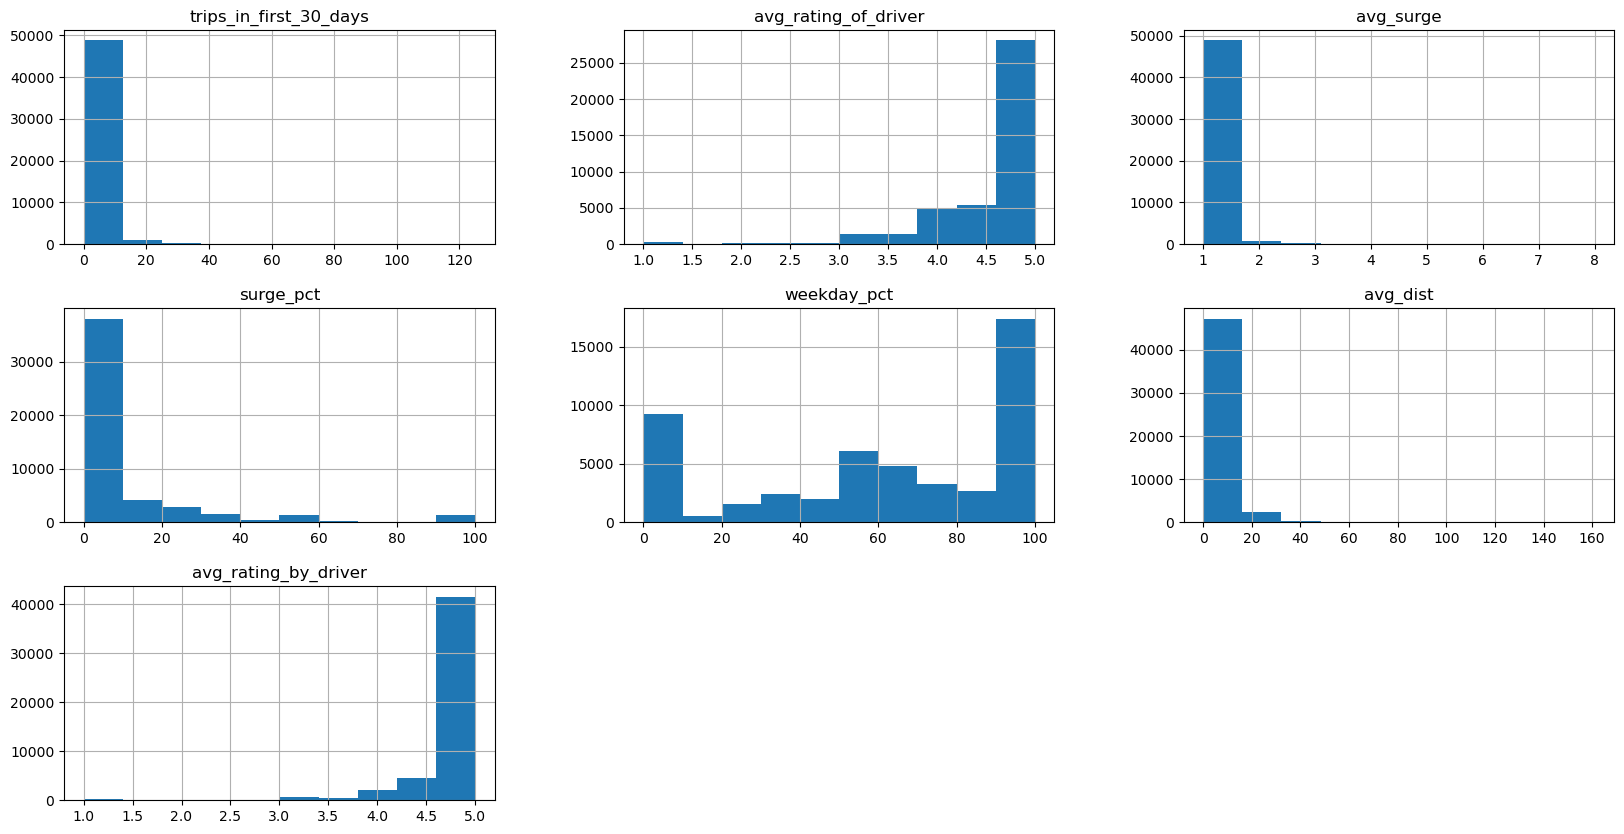

In [20]:
#look at distributions of  columns
df.hist(figsize = (20,10));

In [21]:
print('city cardinality:', df['city'].nunique())
print('phone cardinality:', df['phone'].nunique())

city cardinality: 3
phone cardinality: 2


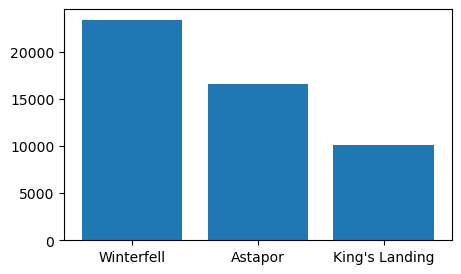

In [22]:
plt.figure(figsize=(5, 3)) 
city_counts = df['city'].value_counts()
plt.bar(city_counts.index, city_counts.values);

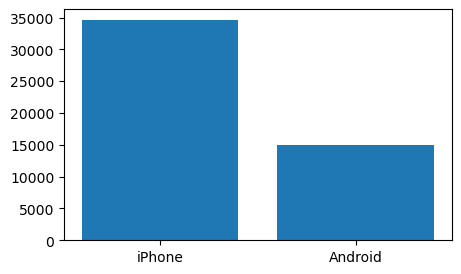

In [23]:
plt.figure(figsize=(5, 3)) 
phone_counts = df['phone'].value_counts()
plt.bar(phone_counts.index, phone_counts.values);

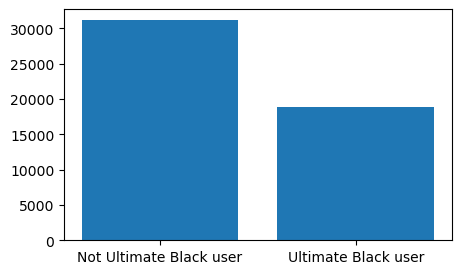

In [24]:
plt.figure(figsize=(5, 3)) 
ultimate_black_counts = df['ultimate_black_user'].value_counts()
plt.bar(ultimate_black_counts.index, ultimate_black_counts.values)
plt.xticks([0, 1], ['Not Ultimate Black user', 'Ultimate Black user']);

# Feature Engineering
In this section, we'll encode columns with low cardinality into dummies and encode timestamp columns as the number of days since the first event. This will put the information into a format the models can better use. 

In [25]:
df_encoded = pd.get_dummies(df, columns = ['city', 'phone'])
df_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False,True,False,False,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,True,False,False,True,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,True,False,False,False,True
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False,True,False,False,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,False,True,True,False


We'll convert the signup_date column to a datetime object, then encode the information as days from creation. This encoded column, 'signup_encoded', will be the user's signup date in reference to the earliest signup date. 

In [26]:
#convert to datetime
df_encoded['signup_date'] = pd.to_datetime(df_encoded['signup_date'])
print(df_encoded['signup_date'].dtype)
signup_reference = df_encoded['signup_date'].min()
print(signup_reference)

datetime64[ns]
2014-01-01 00:00:00


In [27]:
#encode datetime info as number
df_encoded['signup_encoded'] = (df_encoded['signup_date'] - signup_reference).dt.days

In [28]:
df_encoded = df_encoded.drop(['signup_date'], axis = 1)
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_encoded
0,4,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False,True,False,False,True,24
1,0,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,True,False,False,True,False,28
2,3,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,True,False,False,False,True,5
3,9,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False,True,False,False,True,9
4,14,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,False,True,True,False,26


In [29]:
df_encoded['last_trip_date'].max()

'2014-07-01'

Repeat the process, encoding 'last_trip_date'

In [30]:
#convert to datetime
df_encoded['last_trip_date'] = pd.to_datetime(df_encoded['last_trip_date'])
print(df_encoded['last_trip_date'].dtype)
last_trip_reference = df_encoded['last_trip_date'].min()
print(last_trip_reference)

datetime64[ns]
2014-01-01 00:00:00


In [31]:
#encode datetime info as number
df_encoded['last_trip_encoded'] = (df_encoded['last_trip_date'] - last_trip_reference).dt.days

In [32]:
df_encoded = df_encoded.drop(['last_trip_date'], axis = 1)
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_encoded,last_trip_encoded
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,False,True,False,False,True,24,167
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,True,False,False,True,False,28,124
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,True,False,False,False,True,5,6
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,False,True,False,False,True,9,179
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False,False,True,True,False,26,73


# Define target variable
We are interested in users who retained, considering "active" users as those who to a trip in the preceding 30 days (presumably counting from the most recent day in the dataset). We will filter for users who meet this criteria, then create a new column that labels whether or not users are classes as "active". This will be our target variable

In [33]:
#Most recent day in dataset
final_day = df_encoded['last_trip_encoded'].max()
earliest_day = final_day - 30
print("We are interested in customers who took at least one trip between days:", earliest_day, "-", final_day)

We are interested in customers who took at least one trip between days: 151 - 181


In [40]:
#create boolean mask, assigning True or False values based on whether column values meet criteria
mask = (df_encoded['last_trip_encoded'] >= 151) & (df_encoded['last_trip_encoded'] < 181)
#filter users by applying mask. Create df active_users, a subset of df_encoded which includes only
#rows where 'last_trip_encoded' values meet active user criteria
active_users = df_encoded[mask]
active_users

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,signup_encoded,last_trip_encoded
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,False,True,False,False,True,24,167
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,False,True,False,False,True,9,179
5,2,3.5,1.00,0.0,True,100.0,10.56,5.0,False,False,True,False,True,8,156
13,0,4.0,1.38,50.0,False,50.0,3.04,5.0,False,True,False,False,True,28,158
16,1,5.0,1.00,0.0,True,50.0,10.86,3.0,False,True,False,True,False,10,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49973,2,4.0,1.00,0.0,True,25.0,4.07,5.0,True,False,False,False,True,0,178
49975,11,3.9,1.03,4.1,False,91.8,2.18,4.8,False,False,True,False,True,10,168
49988,1,4.5,1.00,0.0,False,50.0,2.53,5.0,False,True,False,False,True,19,164
49991,0,5.0,1.25,100.0,False,0.0,1.06,5.0,False,False,True,False,True,7,179


In [35]:
#initialize column 'active' in df_encoded to 0
df_encoded['active'] = 0
#update df_encoded['active'] column to reflect user status
df_encoded['active_y'

SyntaxError: incomplete input (2998512797.py, line 6)

# More Exploratory analysis, two dimensional visualizations

In [ ]:
pairplots